# Dealing with Correlated data

In this notebook we will calculate the first and the second moment of an analytical blackbox in two cases:
- Independent Samples
- Correlated Samles

The problem is four-dimensional: the uncertain inputs are:
- Inlet and Outlet Total Temperatures  ($T_1$, $T_2$)
- Inlet and Outlet Total Pressures ($P_1$, $P_2$).

The blackbox is the thermal efficiency of a Gas Turbine; the mean values of the uncertain parameters are typical of a LPT.

## 1) Independent Data
Modules to be imported:

In [1]:
from equadratures import *
import numpy as np

In the lines below the turbine efficiency has been defined: the uncertain values of the variables $T_1$, $T_2$, $P_1$, $P_2$ are assigned to the values assumed by the Input X.

In [2]:
def efficiency(x):
    t1 = x[0]
    t2 = x[1]
    p1 = x[2]
    p2 = x[3]
    gamma = 1.41
    ???
    return eta * 100.0

The mean values of the Total Temperatures and Pressures have to be specified (see slides):

In [3]:
# Mean values
T01 = ??? # Kelvin
T02 = ??? # Kelvin
P01 = ??? # psi
P02 = ??? # psi

The statistical distribution which better describes the uncertainties related to the inputs are **truncated-gaussians**. Since a **truncated-gaussian** is constructed from a Gaussian, the mean and the variance have to be specied (variables ``shape_parameter_A`` and ``shape_parameter_B`` respectively). The domain of the samples is a closed set between the ``lower`` and ``upper``.

In [4]:
# Define parameters 
t1 = Parameter(???)
t2 = ???
p1 = ???
p2 = ???

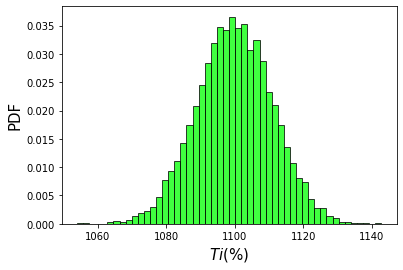

In [5]:
# PDF of s2 is plotted here
import matplotlib.pyplot as plt
z2_samples = t1.get_samples(9000)
n, bins, patches = plt.hist(z2_samples, 50, density=True, facecolor='lime', alpha=0.75, edgecolor='k')
plt.xlabel(r'$Ti (\%)$', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

Set a ``tensor-grid`` ``Basis`` and a ``Poly`` with ``numerical-integration``.

In [6]:
myBasis = ???
myPoly = ???
???

The first and and the second moment of the efficiency can now be calculated.

In [7]:
mean, var = ???

In [8]:
print(mean, 1.96*np.sqrt(var))

97.18759840021818 7.463675642377481


### 2) Correlated Data

Let's define a correlation matrix $R$ which describes a strong positive correlation between Temperatures (the Pearson coefficient is equal to $0.9$) and between Pressures (the Pearson coefficient is $0.8$).

In [9]:
R = np.array([[1.0, 0.9, 0.0, 0.0],
              [0.9, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.8],
              [0.0, 0.0, 0.8, 1.0]])

The instance of the ``Correlation`` class needs the set of input Parameters and the Correlation Matrix previously defined.

In [10]:
corr = Correlations(???, ???)

The next step is the calcultion of the coefficients for the new case, followed by the transformation of the inpendent points to a new *physical* space with correlation.

In [11]:
corr_efficiency = ???

In [12]:
corrpoly = ???

Now we can evaluate the mean and the variance for the case in which the inputs of the blackbox are correlated.

In [13]:
???
print(mean, 1.96*np.sqrt(var))

97.20052089989314 2.4747998766965207


### Graphical comparison of correlated Data and independent one

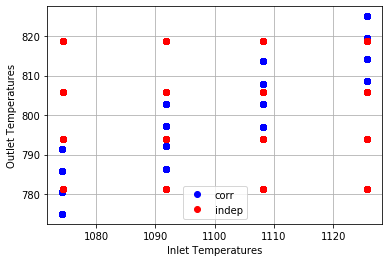

In [14]:
import matplotlib.pyplot as plt

c_samples = ???
i_samples = ???
#fig = plt.figure()
# temperatures
plt.grid()
plt.plot(c_samples[:,0], c_samples[:,1], 'o', c= 'blue', label='corr')
plt.plot(i_samples[:,0], i_samples[:,1], 'o', c = 'red', label='indep')
plt.legend()
plt.xlabel('Inlet Temperatures')
plt.ylabel('Outlet Temperatures')
plt.show()